In [122]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
import pandas as pd

In [129]:
data = pd.read_csv('../Data/Raw_simulation.csv')
x = np.array(data.iloc[:,1:data.shape[1]])
y = np.array(data.iloc[:,0])

In [130]:
x

array([[ 1.        , -1.18439617,  0.5757819 , ...,  0.        ,
         1.        , -1.        ],
       [ 1.        , -0.74033047, -0.87456064, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        , -0.7335904 ,  0.56883181, ...,  0.        ,
        -1.        ,  1.        ],
       ..., 
       [ 1.        , -0.07548287, -0.9024933 , ...,  0.        ,
        -1.        ,  1.        ],
       [ 1.        ,  2.21644524,  0.61111877, ...,  1.        ,
        -1.        , -1.        ],
       [ 1.        , -0.30359783,  0.74221116, ...,  0.        ,
        -1.        , -1.        ]])

In [131]:
y

array([ 0.87932681,  0.99994029,  0.17878075, ...,  0.63817866,
        1.        ,  0.12288769])

In [132]:
y[y>0.5]=1
y[y<=0.5]=0

In [133]:
y

array([ 1.,  1.,  0., ...,  1.,  1.,  0.])

In [134]:
np.mean(y)

0.54949000000000003

In [135]:
np.shape(x)

(100000, 18)

In [143]:
model1 = Sequential()
model1.add(Dense(100, input_dim=np.shape(x)[1], activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model1.fit(x[0:79999,:], y[0:79999],epochs=20,batch_size=128)
score1 = model1.evaluate(x[80000:99999,:], y[80000:99999], batch_size=128)

Epoch 1/20
79999/79999 [==============================] - 2s - loss: 0.2067 - acc: 0.9139     
Epoch 2/20
79999/79999 [==============================] - 1s - loss: 0.1279 - acc: 0.9435     
Epoch 3/20
79999/79999 [==============================] - 1s - loss: 0.1208 - acc: 0.9458     
Epoch 4/20
79999/79999 [==============================] - 1s - loss: 0.1180 - acc: 0.9480     
Epoch 5/20
79999/79999 [==============================] - 1s - loss: 0.1164 - acc: 0.9491     
Epoch 6/20
79999/79999 [==============================] - 1s - loss: 0.1151 - acc: 0.9490     
Epoch 7/20
79999/79999 [==============================] - 1s - loss: 0.1142 - acc: 0.9489     
Epoch 8/20
79999/79999 [==============================] - 1s - loss: 0.1130 - acc: 0.9499     
Epoch 9/20
79999/79999 [==============================] - 1s - loss: 0.1113 - acc: 0.9505     
Epoch 10/20
79999/79999 [==============================] - 1s - loss: 0.1104 - acc: 0.9515     
Epoch 11/20
79999/79999 [========================

In [144]:
score1

[0.11517418525497213, 0.94994749733314343]

In [138]:
## 1 and 3, 2 and 3
ncol = np.shape(x)[1]
inter1 = np.array(x[:,0]*x[:,2])
inter2 = np.array(x[:,1]*x[:,2])

In [139]:
inter1.shape=(100000,1)
inter2.shape=(100000,1)

In [140]:
new_x = np.hstack((x,inter1,inter2))
new_x.shape

(100000, 20)

In [145]:
model2 = Sequential()
model2.add(Dense(100, input_dim=np.shape(new_x)[1], activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model2.fit(new_x[0:79999,:], y[0:79999],epochs=20,batch_size=128)
score2 = model2.evaluate(new_x[80000:99999,:], y[80000:99999], batch_size=128)

Epoch 1/20
79999/79999 [==============================] - 2s - loss: 0.2120 - acc: 0.9130     
Epoch 2/20
79999/79999 [==============================] - 1s - loss: 0.1263 - acc: 0.9451     
Epoch 3/20
79999/79999 [==============================] - 1s - loss: 0.1201 - acc: 0.9480     
Epoch 4/20
79999/79999 [==============================] - 1s - loss: 0.1157 - acc: 0.9492     
Epoch 5/20
79999/79999 [==============================] - 1s - loss: 0.1131 - acc: 0.9502     
Epoch 6/20
79999/79999 [==============================] - 1s - loss: 0.1111 - acc: 0.9513     
Epoch 7/20
79999/79999 [==============================] - 1s - loss: 0.1102 - acc: 0.9512     
Epoch 8/20
79999/79999 [==============================] - 1s - loss: 0.1086 - acc: 0.9520     
Epoch 9/20
79999/79999 [==============================] - 1s - loss: 0.1079 - acc: 0.9522     
Epoch 10/20
79999/79999 [==============================] - 1s - loss: 0.1074 - acc: 0.9529     
Epoch 11/20
79999/79999 [========================

In [146]:
score2

[0.11932128423812706, 0.94874743733014322]

In [3]:
import numpy as np
acc1=[0.9139,0.9435,0.9458,0.9480,0.9491,0.9490,0.9489,0.9499,0.9505,0.9515,0.9515,0.9522,0.9523,0.9530,0.9529,0.9530,0.9536,0.9536,0.9543,0.9535]
acc2=[0.9130,0.9451,0.9480,0.9492,0.9502,0.9513,0.9512,0.9520,0.9522,0.9529,0.9533,0.9529,0.9529,0.9535,0.9537,0.9541,0.9542,0.9539,0.9548,0.9545]
err1=1-np.array(acc1)
err2=1-np.array(acc2)

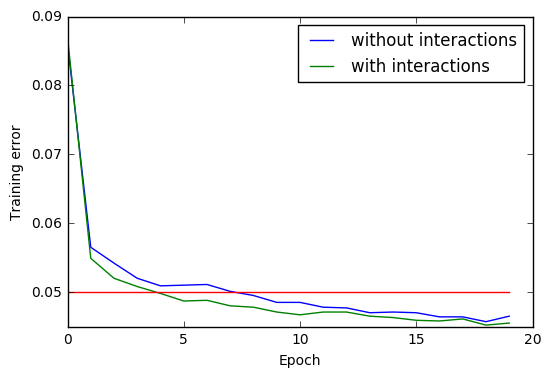

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(20),err1,label='without interactions')
plt.plot(range(20),err2,label='with interactions')
plt.plot(range(20),np.ones(20)*0.05)
plt.xlabel("Epoch")
plt.ylabel("Training error")
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv('../Data/Raw_simulation.csv')
x = np.array(data.iloc[:,1:data.shape[1]])
y = np.array(data.iloc[:,0])